In [1]:
import fasttext
import numpy as np
import pandas as pd

In [3]:
model = fasttext.load_model('cc.id.300.bin')

ValueError: cc.id.300.bin cannot be opened for loading!

In [4]:
df = pd.read_json('datalabels_inset_3.json')
df

,text,author,cleantext,tokenized,stemming,polarity,labels
0,"Turunkan tunjangan untuk DPR, alihkan untuk su...",abu studio chanel,turunkan tunjangan untuk dpr alihkan untuk sub...,"[turunkan, tunjangan, untuk, dpr, alihkan, unt...","[turun, tunjang, untuk, dpr, alih, untuk, subs...",-0.0024,negatif
1,Terimakasih pak de Saya seorang tukang ojek ka...,al rozaq,terimakasih pak de saya seorang tukang ojek ka...,"[terimakasih, pak, de, saya, seorang, tukang, ...","[terimakasih, pak, de, saya, orang, tukang, oj...",-0.0013,negatif
2,Saya sebagai rakyat kecil mendengar bbm naik s...,Davin Davin,saya sebagai rakyat kecil mendengar bbm naik s...,"[saya, sebagai, rakyat, kecil, mendengar, bbm,...","[saya, bagai, rakyat, kecil, dengar, bbm, naik...",-0.0067,negatif
3,Terima kasih banyak Pak Jokowi. Kebijakan Bapa...,Zul Haqqi,terima kasih banyak pak jokowi kebijakan bapak...,"[terima, kasih, banyak, pak, jokowi, kebijakan...","[terima, kasih, banyak, pak, jokowi, bijak, ba...",0.0090,positif
4,Semoga Allah SWT memudahkan semua urusan rakya...,R.E. Handhita,semoga allah swt memudahkan semua urusan rakya...,"[semoga, allah, swt, memudahkan, semua, urusan...","[moga, allah, swt, mudah, semua, urus, rakyat,...",0.1049,positif
...,...,...,...,...,...,...,...
2995,"Pupuk subsidi langka,,, \nBBM naik,,, \nHarga ...",Heru Purnomo,pupuk subsidi langka bbm naik harga gabah dan ...,"[pupuk, subsidi, langka, bbm, naik, harga, gab...","[pupuk, subsidi, langka, bbm, naik, harga, gab...",-0.2002,negatif
2996,Saya berharap bbm turun. Kasihan anak kost di ...,Nerry_shop,saya berharap bbm turun kasihan anak kost di p...,"[saya, berharap, bbm, turun, kasihan, anak, ko...","[saya, harap, bbm, turun, kasihan, anak, kost,...",-0.0557,negatif
2997,saran saya daripada ngasih BLT yg tidak merata...,jubez gaming,saran saya daripada ngasih blt yg tidak merata...,"[saran, saya, daripada, ngasih, blt, yg, tidak...","[saran, saya, daripada, ngasih, blt, yg, tidak...",-0.0042,negatif
2998,Presiden blusukan mantapp 😂,dea bagas,presiden blusukan mantapp,"[presiden, blusukan, mantapp]","[presiden, blusukan, mantapp]",0.6124,positif


In [3]:
df.dtypes

text          object
author        object
cleantext     object
tokenized     object
stemming      object
polarity     float64
labels        object
dtype: object

In [5]:
df['cleantext'].to_csv('cleantext.txt')

In [6]:
model = fasttext.train_unsupervised('cleantext.txt', minn=2, maxn=6)

In [10]:
coba = model.get_sentence_vector('cius')
print(coba)

[-0.19855939  0.03875302 -0.17399967 -0.03283912  0.00741728  0.14873497
  0.00923368 -0.07806025  0.02145378  0.1052957  -0.11378203 -0.09752372
 -0.0202341  -0.04964916  0.02015365  0.05982962 -0.2491079  -0.12838998
 -0.07840844 -0.14501382  0.01833141  0.06502945  0.15196739  0.03392608
  0.17364588  0.18900959 -0.02164472  0.01598145  0.04183894  0.02405644
  0.12731211  0.13581318  0.09582253  0.00059012 -0.14712085 -0.09419531
  0.11202594 -0.11119952 -0.08159056 -0.00234388  0.09320132  0.00417271
  0.06415252  0.03009872 -0.01897545 -0.06364392 -0.05691292  0.11561205
 -0.13332514 -0.14863822  0.0385203  -0.04450426 -0.13498051 -0.07793257
 -0.14133526  0.01813253  0.07083115 -0.0384236   0.03884346 -0.05782101
  0.08262521 -0.08870179  0.01768987 -0.2096736   0.08186413  0.03864308
 -0.08711512  0.05177408 -0.02112103 -0.04789668  0.07509778  0.14506292
  0.02970631  0.06725346 -0.12037333 -0.02070639  0.08532613  0.02597072
 -0.0941985  -0.05051656  0.03546094  0.05738033 -0

In [4]:
arr = []
for i in df['stemming']:
    arr.append(model.get_sentence_vector(' '.join(i)))

In [5]:
arr = np.array(arr)

In [6]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
label = df['labels'].values
y = labenc.fit_transform(label)
y

array([0, 0, 0, ..., 0, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(arr,y,test_size = 0.25,random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
clf = GaussianNB()
clf.fit(xtrain, ytrain)

GaussianNB()

In [10]:
ypred=clf.predict(xtest)

Nilai Akurasi :  0.5626666666666666
              precision    recall  f1-score   support

           0       0.57      0.93      0.70       419
           1       0.52      0.10      0.17       331

    accuracy                           0.56       750
   macro avg       0.54      0.51      0.44       750
weighted avg       0.55      0.56      0.47       750



<AxesSubplot:>

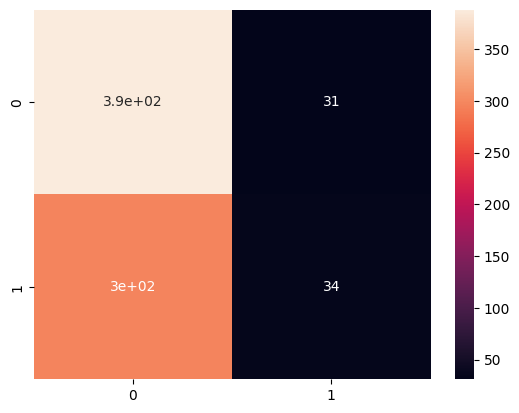

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

print("Nilai Akurasi : ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
sb.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [48]:
sum(ypred == 1)

48

In [30]:
hasil = [coba]
clf.predict(hasil)

array([0])